# Bernstein-Vazirani Algorithm

* A black box is used to evaluate the value of a function with a n-bit string input and output 0 or 1

What this function actually computes is the vitwise product of the input with a hidden string s, the latter is what we are trying to find out.

Let M = {0,1} be a set. f is defined as:

$$ f: M \times M ... \times M \rightarrow M $$

In this example we will use 3-bit string and our hidden string s = 011 (this is what we actually seek and based on that we will build our oracle)

In [31]:
import numpy as np
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram

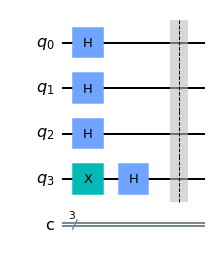

In [32]:
# create the quantum circuit, 1st register of with 3 qubits will be our x input to the oracle
# 4th qubit will be 
circuit = QuantumCircuit(4, 3)

# hidden string is 011
hidden = '011'

# Apply hadamard gate to string register and put last qubit to |-> for the phase kickback trick
circuit.h(range(3))
circuit.x(3)
circuit.h(3)

circuit.barrier()

%matplotlib inline
circuit.draw('mpl')

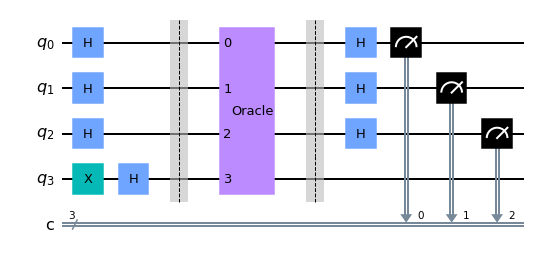

In [33]:
# we have to construct the oracle
# the quantum version of the oracle is to apply cnot operators with string qbits as control and last qubit |-> as target, only for those string qubits that are bit equal to 1 in s 
def oracle(hidden):
    circuit = QuantumCircuit(4)

    for i in range(3):
        if hidden[i] == '1':
            circuit.cnot(i, 3)

    return circuit

# apply the oracle to our circuit
circuit.compose(oracle(hidden).to_gate(label = 'Oracle'), inplace = True)

circuit.barrier()

# apply the hadamard gate to get the hiddden answer written in the string register state as basis encoding
circuit.h(range(3))

# measure the 1st register to get the hidden answer
circuit.measure(range(3), range(3))

%matplotlib inline
circuit.draw('mpl')

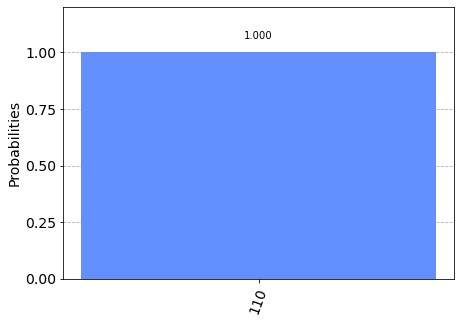

In [34]:
# simulate the circuit
from qiskit import Aer

simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

* The result from our measurement is as we expected the hidden string 001